In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import pickle
import numpy as np

In [ ]:
with open('/content/states.pkl', 'rb') as f:
  data = pickle.load(f)

In [ ]:
states = []
actions = []

In [ ]:
# 試行ごとの状態とアクションを保持
all_states = []  # 試行ごとの状態リスト
all_actions = []  # 試行ごとのアクションリスト

for trial in data:
    states = []
    actions = []
    for t in range(len(trial) - 1):  # 最後のステップは次の状態がないので -1
        #state = trial[t]  # 現在の状態（自分の位置も使う場合）
        state = trial[t][2:] #(自分の位置を使わない場合)
        action = trial[t + 1][:2]  # 次の自分の位置 (x_t+1, y_t+1)
        states.append(state)
        actions.append(action)
    all_states.append(np.array(states))
    all_actions.append(np.array(actions))

# 結果確認
for i, (states, actions) in enumerate(zip(all_states, all_actions)):
    print(f"Trial {i + 1}")
    print("States:\n", states)
    print("Actions:\n", actions)

Trial 1
States:
 [[   25.    40.  -520.   155.]
 [   25.    40.  -520.   155.]
 [   25.    40.  -525.   155.]
 [   25.    40.  -520.   155.]
 [   25.    40.  -515.   155.]
 [  994.   273.   220.  -170.]
 [  998.   293.   260.  -230.]
 [ 1012.   255.    80.  -280.]
 [ 1001.   331.   275.  -190.]
 [ 1004.   348.   275.  -135.]
 [ 1018.   318.    80.  -205.]
 [ 1008.   364.   265.  -120.]
 [ 1000.   361.   -40.   -15.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.

In [ ]:
# 全てのデータを1つのリストにまとめる
all_states = []
all_actions = []

for trial in data:
    for t in range(len(trial) - 1):  # 最後のデータを除く
        #state = trial[t] #自分の位置を使う場合
        state = trial[t][2:]#(自分の位置を使わない場合)
        action = trial[t + 1][:2]
        all_states.append(state)
        all_actions.append(action)

# Numpy配列に変換
all_states = np.array(all_states)
all_actions = np.array(all_actions)

print("All States shape:", all_states.shape)  # (総データ数, 4)
print("All Actions shape:", all_actions.shape)  # (総データ数, 2)


All States shape: (710, 4)
All Actions shape: (710, 2)


In [ ]:
states = torch.tensor(all_states, dtype=torch.float32)
actions = torch.tensor(all_actions, dtype=torch.float32)

In [ ]:
states.shape

torch.Size([710, 4])

In [ ]:
actions.shape

torch.Size([710, 2])

In [ ]:
class PuckHandDataset(Dataset):
  def __init__(self, states, actions):
    self.states = states
    self.actions = actions
  def __len__(self):
    return len(self.states)

  def __getitem__(self, idx):
    return self.states[idx], self.actions[idx]

In [ ]:
dataset = PuckHandDataset(states, actions)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

In [ ]:
class PolicyModel(nn.Module):
  def __init__(self, state_dim, action_dim):
    super(PolicyModel, self).__init__()
    self.fc = nn.Sequential(
        nn.Linear(state_dim, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64,action_dim)
    )
  def forward(self, x):
    return self.fc(x)

In [ ]:
policy_model = PolicyModel(4,2)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(policy_model.parameters(), lr=0.001)
num_epochs = 50
history = []

In [ ]:
#学習
for epoch in range(num_epochs):
  policy_model.train()
  total_loss = 0.0
  for x_input, y_target in dataloader:
    y_pred = policy_model(x_input)
    loss = criterion(y_pred, y_target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item() * x_input.size(0)

  avg_loss = total_loss / len(dataset)
  history.append(avg_loss)
  print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/50], Loss: 112.2882
Epoch [2/50], Loss: 9.4096
Epoch [3/50], Loss: 3.2039
Epoch [4/50], Loss: 2.7745
Epoch [5/50], Loss: 1.5060
Epoch [6/50], Loss: 3.3999
Epoch [7/50], Loss: 6.9538
Epoch [8/50], Loss: 6.3650
Epoch [9/50], Loss: 4.5796
Epoch [10/50], Loss: 4.7271
Epoch [11/50], Loss: 11.6532
Epoch [12/50], Loss: 4.5775
Epoch [13/50], Loss: 4.3356
Epoch [14/50], Loss: 5.8025
Epoch [15/50], Loss: 2.7143
Epoch [16/50], Loss: 4.2089
Epoch [17/50], Loss: 4.7800
Epoch [18/50], Loss: 2.1645
Epoch [19/50], Loss: 2.4370
Epoch [20/50], Loss: 2.4153
Epoch [21/50], Loss: 1.1455
Epoch [22/50], Loss: 2.7286
Epoch [23/50], Loss: 3.3041
Epoch [24/50], Loss: 1.4337
Epoch [25/50], Loss: 4.6050
Epoch [26/50], Loss: 3.1346
Epoch [27/50], Loss: 2.3386
Epoch [28/50], Loss: 3.1776
Epoch [29/50], Loss: 6.4517
Epoch [30/50], Loss: 2.1685
Epoch [31/50], Loss: 1.8920
Epoch [32/50], Loss: 0.5996
Epoch [33/50], Loss: 0.5514
Epoch [34/50], Loss: 1.7707
Epoch [35/50], Loss: 0.7016
Epoch [36/50], Loss: 1.313

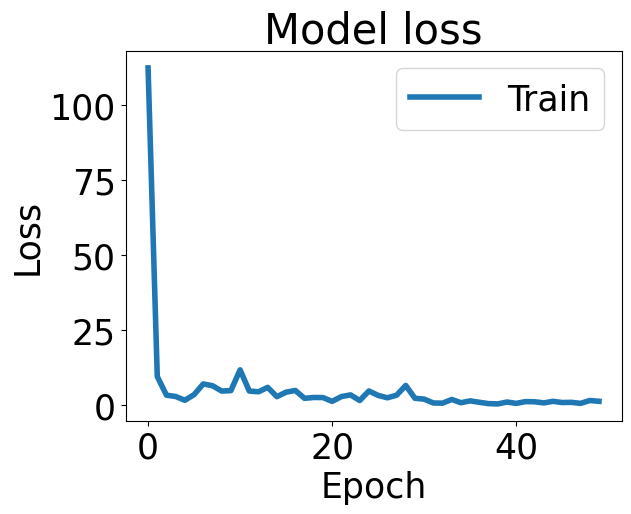

In [ ]:
#lossの可視化
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 25
plt.rcParams['lines.linewidth'] = 4

plt.plot(history)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')

In [ ]:
policy_model.eval()

PolicyModel(
  (fc): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=2, bias=True)
  )
)

In [ ]:
dummy_input = torch.randn(1, 4)
policy_model(dummy_input)

tensor([[0.0729, 0.0976]], grad_fn=<AddmmBackward0>)

In [ ]:
import torch.onnx

In [ ]:
# TorchScript形式に変換
scripted_model = torch.jit.script(policy_model)
scripted_model.save("model.pt")
print("TorchScriptモデルを保存しました: model.pt")

TorchScriptモデルを保存しました: model.pt
